Table of contents:
- Markov Chains - Theoretical Foundations
    - Markov Property
    - State Space
    - Transition Probability Matrix
- Maximum Likelihood Estimation of Transition Probabilities
- Markov Chains: Text Generation 

In [1]:
# Import required libraries
import numpy as np
from collections import defaultdict

# Markov Chains - Theoretical Foundations

- A Markov Chain models sequences of events where each event's probability depends on previous state(s)
- In the context of language modelling:
    - States are sequences of tokens (words) of length `order`
    - Transitions represent probabilities of next words given current state
    - Predictions depend only on current state

## **Markov Property**
For a sequence of random variables $(X_1, X_2, ..., X_t)$, the $n$-th order Markov property is defined as:

$$P(X_{t+1} | X_1, ..., X_t) = P(X_{t+1} | X_t, X_{t-1}, ..., X_{t-n+1})$$

where $n$ is the order of the Markov chain.

#### For $n = 1$ (First-order Markov Chain):
The equation becomes:
$$P(X_{t+1} | X_1, ..., X_t) = P(X_{t+1} | X_t)$$

This means that the probability of the next word only depends on the current word. This is the most common form of the Markov property, often called the "memoryless" property. The system only "remembers" its immediate previous word.

#### For $n = 2$ (Second-order Markov Chain):
The equation becomes:
$$P(X_{t+1} | X_1, ..., X_t) = P(X_{t+1} | X_t, X_{t-1})$$

In this case, the probability of the next word depends on both the current word and the previous word. The system "remembers" the last two word when determining the probability of the next word.

## **State Space**
Let $V$ be the vocabulary of tokens. The state space $S$ for an $n$-th order Markov chain is:

$$S = V^n$$

where:
- $V^n$ represents all possible sequences of length $n$ from vocabulary $V$
- Each state $s \in S$ is a tuple $(w_1, w_2, ..., w_n)$ where each $w_i \in V$

For vocabulary size $|V|$ and order $n$:
- Number of possible states: $|V|^n$


#### **Example**: State Space with |V| = 5

Let's consider a simple vocabulary V = {a, b, c, d, e}

 **First-Order Markov Chain (n=1)**

For n=1, each state is a single token:
S = V = {a, b, c, d, e}

$|V| = 5$

Total number of states:  $|V|^1 = 5$ 

In [2]:
# first-order state space
vocabulary = ['a', 'b', 'c', 'd', 'e']
first_order_states = vocabulary

print("First-order states:")
for i, state in enumerate(first_order_states, 1):
    print(f"State {i}: ({state})")

print(f"\nTotal states: {len(first_order_states)}")

First-order states:
State 1: (a)
State 2: (b)
State 3: (c)
State 4: (d)
State 5: (e)

Total states: 5


**Second-Order Markov Chain (n=2)**

For n=2, each state is a sequence of 2 tokens:
S = V² = {(a,a), (a,b), (a,c), ..., (e,e)}

Total number of states = |V|² = 5² = 25 

In [3]:
# second-order state space
from itertools import product

second_order_states = list(product(vocabulary, repeat=2))

print("Sample of second-order states:")
for i, state in enumerate(second_order_states[:10], 1):  # Show first 10 states
    print(f"State {i}: {state}")

print(f"\nTotal states: {len(second_order_states)} (showing first 10 of {5**2})")

Sample of second-order states:
State 1: ('a', 'a')
State 2: ('a', 'b')
State 3: ('a', 'c')
State 4: ('a', 'd')
State 5: ('a', 'e')
State 6: ('b', 'a')
State 7: ('b', 'b')
State 8: ('b', 'c')
State 9: ('b', 'd')
State 10: ('b', 'e')

Total states: 25 (showing first 10 of 25)


**Third-Order Markov Chain (n=3)**

For n=3, each state is a sequence of 3 tokens:
S = V³ = {(a,a,a), (a,a,b), (a,a,c), ..., (e,e,e)}

Total number of states = |V|³ = 5³ = 125 states

In [4]:
# third-order state space
third_order_states = list(product(vocabulary, repeat=3))

print("Sample of third-order states:")
for i, state in enumerate(third_order_states[:10], 1):  # Show first 10 states
    print(f"State {i}: {state}")

print(f"\nTotal states: {len(third_order_states)} (showing first 10 of {5**3})")

Sample of third-order states:
State 1: ('a', 'a', 'a')
State 2: ('a', 'a', 'b')
State 3: ('a', 'a', 'c')
State 4: ('a', 'a', 'd')
State 5: ('a', 'a', 'e')
State 6: ('a', 'b', 'a')
State 7: ('a', 'b', 'b')
State 8: ('a', 'b', 'c')
State 9: ('a', 'b', 'd')
State 10: ('a', 'b', 'e')

Total states: 125 (showing first 10 of 125)


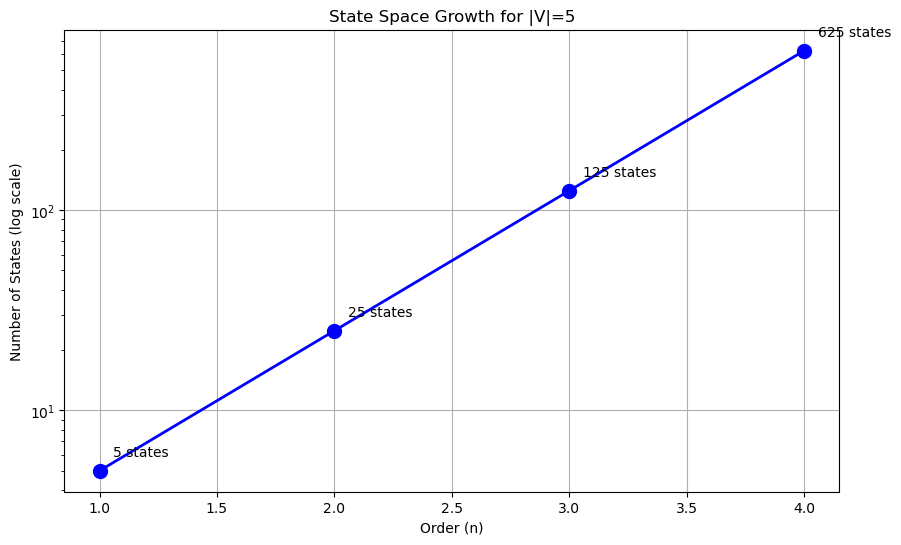

In [5]:
# Visualize state space growth
import matplotlib.pyplot as plt
import numpy as np

orders = range(1, 5)
states = [5**n for n in orders]

plt.figure(figsize=(10, 6))
plt.plot(orders, states, 'bo-', linewidth=2, markersize=10)
plt.yscale('log')
plt.grid(True)
plt.xlabel('Order (n)')
plt.ylabel('Number of States (log scale)')
plt.title('State Space Growth for |V|=5')
for i, txt in enumerate(states):
    plt.annotate(f'{txt} states', (orders[i], states[i]), 
                xytext=(10, 10), textcoords='offset points')
plt.show()

## Transition Probabilities 


For an $n$-th order Markov chain, the probability of the next token depends only on the previous $n$ tokens. For a state $s = (w_{t-n}, ..., w_{t-1})$ and next token $w_t$, the transition probability is:

$$P(w_t | w_{t-n}, ..., w_{t-1}) = P(w_t | s)$$

This probability satisfies the Markov property:

$$P(w_t | w_1, ..., w_{t-1}) = P(w_t | w_{t-n}, ..., w_{t-1})$$

### Transition Matrix

Let $T$ represent the transition matrix. Then $T_{s,w}$, the $(s,w)$-th element of the transition matrix $T$ for an $n$-th order Markov chain is defined as:

$$T_{s,w} = P(w | s) = P(w_t = w | w_{t-n}, ..., w_{t-1})$$

where:
- $s = (w_{t-n}, ..., w_{t-1})$ is the current state (sequence of n previous tokens)
- $w$ is the next token
- The matrix has dimensions $|V|^n \times |V|$, where $|V|$ is the vocabulary size



# Maximum Likelihood Estimation of Transition Probabilities
The transition probabilities can be estimated using Maximum Likelihood Estimation (MLE). For an $n$-th order Markov chain, this gives us:

$$P_{MLE}(w_t | w_{t-n}, ..., w_{t-1}) = \frac{C(w_{t-n}, ..., w_{t-1}, w_t)}{\sum_{w' \in V} C(w_{t-n}, ..., w_{t-1}, w')}$$

where:
- $C(...)$ represents the count of the sequence in the training corpus
- $V$ is the vocabulary (the set of all possible tokens)
- $w'$ ranges over all possible tokens in the vocabulary
- The denominator represents the marginal count of the n-gram context $(w_{t-n}, ..., w_{t-1})$

**Properties of the MLE estimates:**
1. $0 \leq P_{MLE}(w_t | w_{t-n}, ..., w_{t-1}) \leq 1$ for all sequences
2. $\sum_{w_t \in V} P_{MLE}(w_t | w_{t-n}, ..., w_{t-1}) = 1$ for any context
3. The estimates converge to true probabilities as training data size approaches infinity 

This MLE formulation provides the probability distribution that maximizes the likelihood of observing the training data under the $n$-th order Markov chain model assumptions.

**Example** 

Let's calculate transition probabilities for a simple sequence: "abcabdabe"

For first-order transitions (n=1):

$$P(b|a) = \frac{count(ab)}{count(a)} = \frac{3}{4}$$

$$P(c|b) = \frac{count(bc)}{count(b)} = \frac{1}{3}$$

$$P(d|b) = \frac{count(bd)}{count(b)} = \frac{1}{3}$$

$$P(e|b) = \frac{count(be)}{count(b)} = \frac{1}{3}$$

**Question:**

What is $P(c|a)$?


## Transition Matrix Dimensions

For each order $n$, the transition matrix $T$ has dimensions:
- Rows: $|V|^n$ (number of states)
- Columns: $|V|$ (possible next tokens)

Order | Matrix Dimensions | Total Elements
------|------------------|----------------
1     | 5 × 5           | 25
2     | 25 × 5          | 125
3     | 125 × 5         | 625

In [6]:
import numpy as np
import pandas as pd
from itertools import product

def create_complete_transition_matrix(sequence, n=1):
    """
    Create transition matrix for n-th order Markov chain including all possible states
    
    Parameters:
    sequence: str - input sequence
    n: int - order of Markov chain
    """
    # Get vocabulary (unique characters)
    vocab = sorted(set(sequence))
    
    # Generate all possible n-gram states
    states = [''.join(p) for p in product(vocab, repeat=n)]
    
    # Initialize count matrix with zeros
    counts = {state: {char: 0 for char in vocab} for state in states}
    
    # Count transitions from data
    for i in range(len(sequence)-n):
        current_state = sequence[i:i+n]
        next_char = sequence[i+n]
        counts[current_state][next_char] += 1
    
    # Convert counts to probabilities
    matrix = np.zeros((len(states), len(vocab)))
    for i, state in enumerate(states):
        total = sum(counts[state].values())
        if total > 0:  # If we've seen this state
            for j, char in enumerate(vocab):
                matrix[i][j] = counts[state][char] / total
    
    # Create DataFrame
    df = pd.DataFrame(
        matrix,
        index=states,
        columns=vocab
    )
    return df

# Example usage
sequence = "abcabdabe"

# Second order (n=2)
print("Second-order complete transition matrix:")
print(create_complete_transition_matrix(sequence, n=2).round(3))

Second-order complete transition matrix:
      a    b      c      d      e
aa  0.0  0.0  0.000  0.000  0.000
ab  0.0  0.0  0.333  0.333  0.333
ac  0.0  0.0  0.000  0.000  0.000
ad  0.0  0.0  0.000  0.000  0.000
ae  0.0  0.0  0.000  0.000  0.000
ba  0.0  0.0  0.000  0.000  0.000
bb  0.0  0.0  0.000  0.000  0.000
bc  1.0  0.0  0.000  0.000  0.000
bd  1.0  0.0  0.000  0.000  0.000
be  0.0  0.0  0.000  0.000  0.000
ca  0.0  1.0  0.000  0.000  0.000
cb  0.0  0.0  0.000  0.000  0.000
cc  0.0  0.0  0.000  0.000  0.000
cd  0.0  0.0  0.000  0.000  0.000
ce  0.0  0.0  0.000  0.000  0.000
da  0.0  1.0  0.000  0.000  0.000
db  0.0  0.0  0.000  0.000  0.000
dc  0.0  0.0  0.000  0.000  0.000
dd  0.0  0.0  0.000  0.000  0.000
de  0.0  0.0  0.000  0.000  0.000
ea  0.0  0.0  0.000  0.000  0.000
eb  0.0  0.0  0.000  0.000  0.000
ec  0.0  0.0  0.000  0.000  0.000
ed  0.0  0.0  0.000  0.000  0.000
ee  0.0  0.0  0.000  0.000  0.000


# Markov Chains: Text Generation 

For generating a sequence $(y_1, ..., y_m)$ using an $n$-th order Markov chain:

1. Initial state $s_1 = (x_1, ..., x_n)$ where:
   - $(x_1, ..., x_n)$ is the initial context/seed sequence
   - Length of initial state is $n$ (the order of the Markov chain)

2. For each time step $t = 1$ to $m$:
   
   a. Sample next token from transition distribution:
   $$y_t \sim P_T(· | s_t)$$
   where:
   - $P_T$ is the transition probability matrix
   - $s_t$ is the current state
   - $\sim$ denotes random sampling according to the probabilities
   
   b. Update state by sliding window:
   $$s_{t+1} = (x_{t+1}, ..., x_n, y_t)$$
   where:
   - Remove leftmost token from previous state
   - Append newly generated token $y_t$
   - Maintain fixed context length of $n$

Example for $n=2$:
- Initial state $s_1 = (x_1, x_2)$
- Generate $y_1$ based on $P(·|x_1,x_2)$
- New state $s_2 = (x_2, y_1)$
- Generate $y_2$ based on $P(·|x_2,y_1)$
- New state $s_3 = (y_1, y_2)$
- And so on...

The process continues until we have generated the desired sequence length $m$, with each new token depending on the previous $n$ tokens according to our trained transition probabilities.